In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib . pyplot as plt
import seaborn as sns

## Quan hệ giữa độ tuổi và khả năng bị bệnh tim.

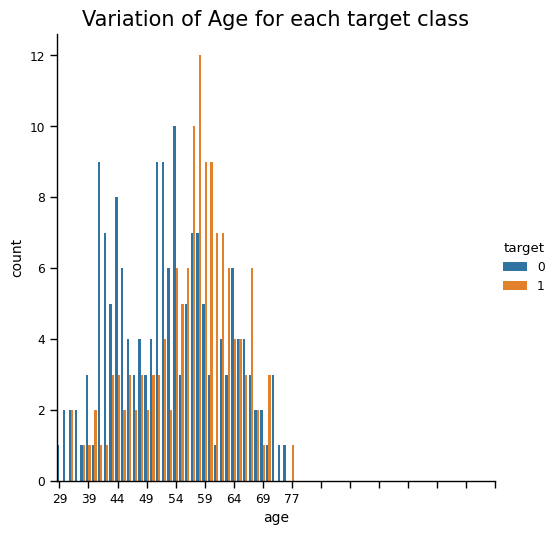

In [26]:
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
              'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# Phân phối của target theo age
sns.set_context("paper", font_scale=1, rc={
                "font.size": 3, "axes.titlesize": 15, "axes.labelsize": 10})
ax = sns.catplot(kind="count", data=df, x='age', hue='target',
                 order=df['age'].sort_values().unique())

# Tuỳ chỉnh trục x
ax.ax.set_xticks(np.arange(0, 80, 5))

# Thiết lập tiêu đề
plt.title('Variation of Age for each target class')
plt.show()

## Quan hệ giữa độ tuổi, giới tính và khả năng bị bệnh tim.

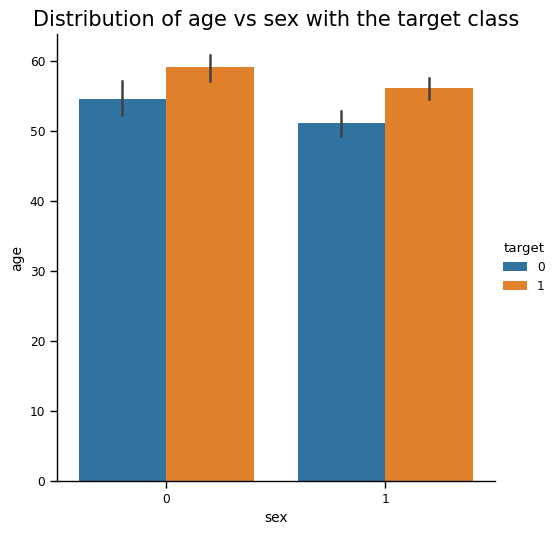

In [27]:
ax = sns.catplot(kind="bar", data=df, y='age', x='sex', hue='target')


# Thiết lập tiêu đề
plt.title('Distribution of age vs sex with the target class')
plt.show()

# Chia Dataset

In [22]:
from sklearn . model_selection import train_test_split

X = df.iloc[:, : -1]. values
y = df.iloc[:, -1]. values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(
    n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np . round(
    (cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np . round(
    (cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for KNeighborsClassifier = {}'. format(
    accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'. format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


# SVM

In [30]:
from sklearn.svm import SVC
# Bạn có thể chọn các kernel khác như 'rbf', 'poly', 'sigmoid', v.v.
model = SVC(kernel='rbf')
model.fit(X_train, y_train)   # Huấn luyện mô hình

SVC()

In [32]:
y_pred = model.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = model.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

accuracy_for_train = np . round(
    (cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np . round(
    (cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for SVC = {}'. format(
    accuracy_for_train))
print('Accuracy for test set for SVC = {}'. format(accuracy_for_test))

Accuracy for training set for SVC = 0.66
Accuracy for test set for SVC = 0.67


# Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

accuracy_for_train = np.round(
    (cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print('Accuracy for training set for GaussianNB = {}'.format(accuracy_for_train))
print('Accuracy for test set for GaussianNB = {}'.format(accuracy_for_test))

Accuracy for training set for GaussianNB = 0.85
Accuracy for test set for GaussianNB = 0.84


# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
    criterion='gini', max_depth=10, min_samples_split=2, random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

accuracy_for_train = np.round(
    (cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print('Accuracy for training set for DecisionTreeClassifier = {}'.format(
    accuracy_for_train))
print('Accuracy for test set for DecisionTreeClassifier = {}'.format(accuracy_for_test))

Accuracy for training set for DecisionTreeClassifier = 1.0
Accuracy for test set for DecisionTreeClassifier = 0.75


# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(
    criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

accuracy_for_train = np.round(
    (cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print('Accuracy for training set for RandomForestClassifier = {}'.format(
    accuracy_for_train))
print('Accuracy for test set for RandomForestClassifier = {}'.format(accuracy_for_test))

Accuracy for training set for RandomForestClassifier = 0.98
Accuracy for test set for RandomForestClassifier = 0.8


# Adaboost

In [37]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(
    n_estimators=50, learning_rate=1.0, random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

accuracy_for_train = np.round(
    (cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print('Accuracy for training set for AdaBoostClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for AdaBoostClassifier = {}'.format(accuracy_for_test))

Accuracy for training set for AdaBoostClassifier = 0.91
Accuracy for test set for AdaBoostClassifier = 0.84


d:\anaconda\envs\aio_2024\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


# GradientBoost

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(
    learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

accuracy_for_train = np.round(
    (cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print('Accuracy for training set for GradientBoostingClassifier = {}'.format(
    accuracy_for_train))
print('Accuracy for test set for GradientBoostingClassifier = {}'.format(
    accuracy_for_test))

Accuracy for training set for GradientBoostingClassifier = 1.0
Accuracy for test set for GradientBoostingClassifier = 0.85


# XGboost

In [39]:
from xgboost import XGBClassifier
classifier = XGBClassifier(objective="binary:logistic",
                           random_state=42, n_estimators=100)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

accuracy_for_train = np.round(
    (cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print('Accuracy for training set for XGBClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for XGBClassifier = {}'.format(accuracy_for_test))

Accuracy for training set for XGBClassifier = 1.0
Accuracy for test set for XGBClassifier = 0.87


# Stacking

In [40]:
from sklearn.ensemble import StackingClassifier

dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(XGBClassifier)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

clf = [('dtc', dtc), ('rfc', rfc), ('knn', knn),
       ('gc', gc), ('ad', ad), ('svc', svc)]
xg = XGBClassifier()
classifier = StackingClassifier(estimators=clf, final_estimator=xg)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)


accuracy_for_train = np.round(
    (cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print('Accuracy for training set for StackingClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for StackingClassifier = {}'.format(accuracy_for_test))

d:\anaconda\envs\aio_2024\lib\site-packages\xgboost\core.py:723: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)
d:\anaconda\envs\aio_2024\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda\envs\aio_2024\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda\envs\aio_2024\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda\envs\aio_2024\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The S

Accuracy for training set for StackingClassifier = 0.91
Accuracy for test set for StackingClassifier = 0.87
